In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import os
import networkx as nx


from scipy.optimize import curve_fit
from config.sqlcollect import getTable
from config.network import graphCreation
from config.cubes import makeCubes
from config.seismicZones import query
from config.network import graphCreation3


from motifs_areasVolumesEnergy import*


In [2]:
import matplotlib.pyplot as plt
import os

from config.sqlcollect import getTable
from config.seismicZones import query


In [3]:
# ---------------------------SETUP AND COLLECTION OF QUAKES------------------------------------#
# Which region do you want to analyze ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# The side of the cubes that you split the region in 
#side = int(input('Input side of the cube split in km 5 / 10 / 20 : '))

# The condition for the SQL collection
sql_query= query(region)

# Magnitude windows for the condition that collects the database through mySQL
magMin = int(input('Input minimum magnitude: '))
magMax = int(input('Input maximum magnitude: '))
# Add to condition
sql_query+=f" AND magnitude>={magMin} AND magnitude<={magMax}"

print(sql_query)

# Collect the earthquakes
quakes = getTable(sql_query)
quakes.head()

SELECT * FROM romania WHERE datetime >='1976-01-01 00:00:00' AND latitude>=45.2 AND latitude<=46 AND longitude>=26 AND longitude<=27 AND depth>=50 AND depth<=200 AND magnitude>=4 AND magnitude<=10


/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,datetime,latitude,longitude,depth,magnitude
0,1976-10-01 17:50:43.200,45.68,26.49,146.0,6.0
1,1977-03-04 19:21:54.100,45.77,26.76,94.0,7.4
2,1977-06-16 02:26:10.300,45.74,26.60,151.0,4.7
3,1977-07-17 17:34:20.900,45.60,26.65,106.0,4.2
4,1977-08-04 22:32:02.100,45.68,26.62,146.0,4.8


In [4]:
mapcoords={'minLat':min(quakes['latitude']),
            'maxLat':max(quakes['latitude']),
            'minLon':min(quakes['longitude']),
            'maxLon':max(quakes['longitude']),
            'minDepth':min(quakes['depth']),
            'maxDepth':max(quakes['depth'])
            }

In [5]:
print(mapcoords)


{'minLat': 45.34, 'maxLat': 45.88, 'minLon': 26.19, 'maxLon': 26.99, 'minDepth': 74.2, 'maxDepth': 171.1}


## VISUALIZATION

In [6]:
#import ipympl

from visualization import visualize

In [7]:
# ----------------------------------------------------------------------------------------------#

# ----------------------------------2D MAP PROJECTION----------------------------------------------#
# Choose if you wish to include a projection of the region's map as 2D image under the 3D scatterplot
# You require png images with the maps for this to" work
withMap = input('Do you wish the scatter to have a projection of the region map ? True / False : ')

<Figure size 720x720 with 0 Axes>

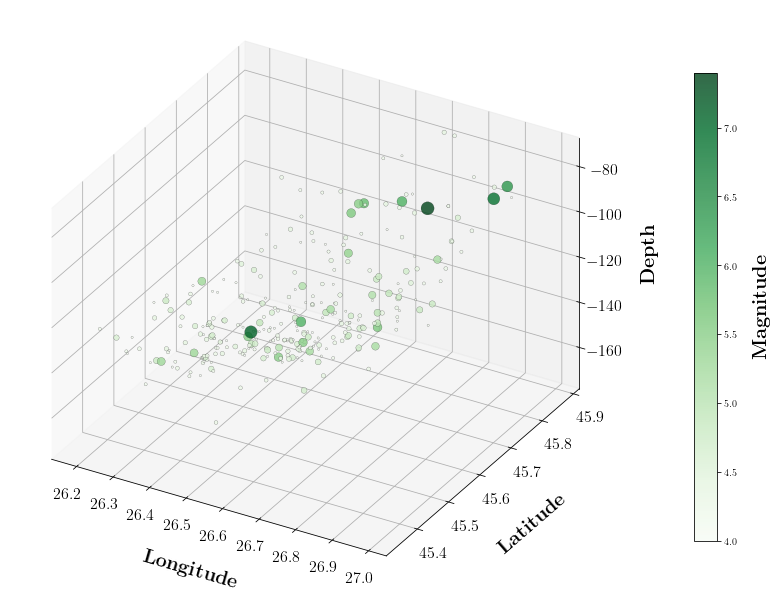

In [8]:
# %matplotlib widget

plt.figure(figsize=(10,10))
ax = visualize(quakes,region,withMap,mapcoords)



if not os.path.exists(f'./results/{region}/visualization'):
    os.makedirs(f'results/{region}/visualization')


if withMap == 'True':
    plt.savefig(f'./results/{region}/visualization/{region}_map.png', bbox_inches = "tight" )
    #plt.savefig(f'./results/{region}/visualization/{region}_maptest.svg', bbox_inches = "tight" )
elif withMap == 'False':
    plt.savefig(f'./results/{region}/visualization/{region}_nomap.png', bbox_inches = "tight")
    #plt.savefig(f'./results/{region}/visualization/{region}_nomaptest.svg', bbox_inches = "tight" )

## SPLIT REGION IN CUBES

In [9]:
from config.cubes import makeCubes

In [10]:
quakes

,datetime,latitude,longitude,depth,magnitude
0,1976-10-01 17:50:43.200,45.6800,26.4900,146.0,6.0
1,1977-03-04 19:21:54.100,45.7700,26.7600,94.0,7.4
2,1977-06-16 02:26:10.300,45.7400,26.6000,151.0,4.7
3,1977-07-17 17:34:20.900,45.6000,26.6500,106.0,4.2
4,1977-08-04 22:32:02.100,45.6800,26.6200,146.0,4.8
...,...,...,...,...,...
380,2021-05-25 21:30:37.400,45.5377,26.5247,131.2,4.3
381,2021-07-06 11:20:00.440,45.5777,26.4473,136.2,4.0
382,2021-09-01 10:32:11.740,45.6337,26.4457,145.2,4.1
383,2022-01-16 13:43:14.950,45.6541,26.5710,137.4,4.1


In [11]:
quakes = makeCubes(quakes,region)
quakes.head()

,datetime,latitude,longitude,depth,magnitude,xLatitude,yLongitude,zDepth,cubeIndex,cubeLatitude,cubeLongitude,cubeDepth
0,1976-10-01 17:50:43.200,45.68,26.49,146.0,6.0,8,5,15,2618,45.6778,26.4748,146.7
1,1977-03-04 19:21:54.100,45.77,26.76,94.0,7.4,10,10,4,3424,45.7679,26.7913,91.7
2,1977-06-16 02:26:10.300,45.74,26.60,151.0,4.7,9,7,16,3018,45.7229,26.6014,151.7
3,1977-07-17 17:34:20.900,45.60,26.65,106.0,4.2,6,8,7,1945,45.5877,26.6647,106.7
4,1977-08-04 22:32:02.100,45.68,26.62,146.0,4.8,8,7,15,2656,45.6778,26.6014,146.7


## NETWORK CREATION

In [12]:
import networkx as nx
from config.network import graphCreation

In [13]:
quakesGraph = graphCreation(quakes)

In [14]:
print(nx.info(quakesGraph))

Graph with 264 nodes and 381 edges


/tmp/ipykernel_230771/3776672541.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(quakesGraph))


## MOTIFS

In [1]:
from nemomap.motifsdiscovery import getMotif
import json

In [2]:
# For which region networks do you want to discover motifs ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# What motifs do you want to discover ?
motif = input('Input motif: Triangles / Tetrahedrons : ')

In [3]:
stats = getMotif(region,motif)
motifStats={}
motifStats[region]={}
motifStats[region][motif]=stats

with open(f"./motifs/motifStats_{region}.json","w") as f:
    json.dump(motifStats,f)

queryTetrahedrons.txt
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks
networkvrancea_10km_3mag.txt


Input Graph: Nodes - 320; Edges - 2534
Query Graph: Nodes - 4; Edges - 4

Query Graph (sub-graph) Edges: 
[0, 1]
[1, 2]
[2, 3]
[0, 3]

H node = [ 3 ]

Mapping: 37656

countN:  0

Mapping: 37656
Average of Mapping in Random Graphs: 20198.0

P value:  0.0
Z Score:  undefined
Time taken: 3.9635770320892334 seconds
networkvrancea_5km_4mag.txt


Input Graph: Nodes - 264; Edges - 375
Query Graph: Nodes - 4; Edges - 4

Query Graph (sub-graph) Edges: 
[0, 1]
[1, 2]
[2, 3]
[0, 3]

H node = [ 3 ]

Mapping: 3

countN:  1

Mapping: 3
Average of Mapping in Random Graphs: 5.0

P value:  1.0
Z Score:  undefined
Time taken: 0.022969961166381836 seconds
networkvrancea_10km_1mag.txt


Input Graph: Nodes - 536; Edges - 5048
Query Graph: Nodes - 4; Edges - 4

Query Graph (sub-graph) Edges: 
[0, 1]
[1, 2]
[2, 3]
[0, 3]

H node = [ 3 ]

Mapping: 119334

countN:  0

Mapping: 119334
Average of Mapping in Ra

KeyboardInterrupt: 

In [ ]:
for region in ['california','italy','japan']:
    for motif in ['Triangles','Tetrahedrons']:
        stats = getMotif(region,motif)
        motifStats={}
        motifStats[region]={}
        motifStats[region][motif]=stats
        

In [4]:
stats

{'networkvrancea_10km_3mag.txt': {'Nodes': 320,
  'Edges': 2534,
  'Mappings': 11909,
  'AvgMap': 3918.0,
  'Time': 0.45299386978149414},
 'networkvrancea_5km_4mag.txt': {'Nodes': 264,
  'Edges': 375,
  'Mappings': 3,
  'AvgMap': 5.0,
  'Time': 0.007648944854736328},
 'networkvrancea_10km_1mag.txt': {'Nodes': 536,
  'Edges': 5048,
  'Mappings': 37121,
  'AvgMap': 10419.0,
  'Time': 1.5338895320892334},
 'networkvrancea_10km_2mag.txt': {'Nodes': 519,
  'Edges': 4960,
  'Mappings': 36789,
  'AvgMap': 6380.0,
  'Time': 1.475003957748413},
 'networkvrancea_10km_4mag.txt': {'Nodes': 113,
  'Edges': 326,
  'Mappings': 135,
  'AvgMap': 41.0,
  'Time': 0.008726119995117188},
 'networkvrancea_5km_2mag.txt': {'Nodes': 1684,
  'Edges': 7383,
  'Mappings': 2137,
  'AvgMap': 945.0,
  'Time': 0.7603740692138672},
 'networkvrancea_5km_1mag.txt': {'Nodes': 1723,
  'Edges': 7471,
  'Mappings': 2124,
  'AvgMap': 886.0,
  'Time': 0.7348294258117676},
 'networkvrancea_5km_3mag.txt': {'Nodes': 983,
  'Edge

In [6]:
motifStats

{'vrancea': {'Triangles': {'networkvrancea_10km_3mag.txt': {'Nodes': 320,
    'Edges': 2534,
    'Mappings': 11909,
    'AvgMap': 3918.0,
    'Time': 0.45299386978149414},
   'networkvrancea_5km_4mag.txt': {'Nodes': 264,
    'Edges': 375,
    'Mappings': 3,
    'AvgMap': 5.0,
    'Time': 0.007648944854736328},
   'networkvrancea_10km_1mag.txt': {'Nodes': 536,
    'Edges': 5048,
    'Mappings': 37121,
    'AvgMap': 10419.0,
    'Time': 1.5338895320892334},
   'networkvrancea_10km_2mag.txt': {'Nodes': 519,
    'Edges': 4960,
    'Mappings': 36789,
    'AvgMap': 6380.0,
    'Time': 1.475003957748413},
   'networkvrancea_10km_4mag.txt': {'Nodes': 113,
    'Edges': 326,
    'Mappings': 135,
    'AvgMap': 41.0,
    'Time': 0.008726119995117188},
   'networkvrancea_5km_2mag.txt': {'Nodes': 1684,
    'Edges': 7383,
    'Mappings': 2137,
    'AvgMap': 945.0,
    'Time': 0.7603740692138672},
   'networkvrancea_5km_1mag.txt': {'Nodes': 1723,
    'Edges': 7471,
    'Mappings': 2124,
    'AvgMap': 

## MOTIFS STATISTICS

In [11]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from motifs_areasVolumesEnergy import*
from config.seismicZones import query
from config.network import graphCreation3

ImportError: cannot import name 'graphCreation3' from 'network' (/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/network.py)

In [7]:
# For which region networks do you want to analyze motifs ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# What motifs do you want to discover ?
motif = input('Input motif: Triangles (for areas) / Tetrahedrons (for volumes) : ')

In [8]:
sql_query= query(region)
mag = 4
side = 5

# Magnitude windows for the condition that collects the database through mySQL
sql_query+=f" AND magnitude>={mag}"

# Collect the earthquakes
quakes = getTable(sql_query)

# Make the Cubes
quakes = makeCubes(quakes,region,side,energyRelease=True)

# Make the network
G = graphCreation3(quakes)




/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [9]:
motifNodes,energyMotif = totalMeanEnergyMotif(region,side,mag,motif,G,quakes)



In [10]:
energyMotif

{"['77', '76', '7']": [1629004115046.766, 226006460951.73608],
 "['141', '108', '52']": [4403161237095.355, 428942758467.47144],
 "['122', '121', '39']": [1635442512689.2656, 145226326293.24026]}

/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetw

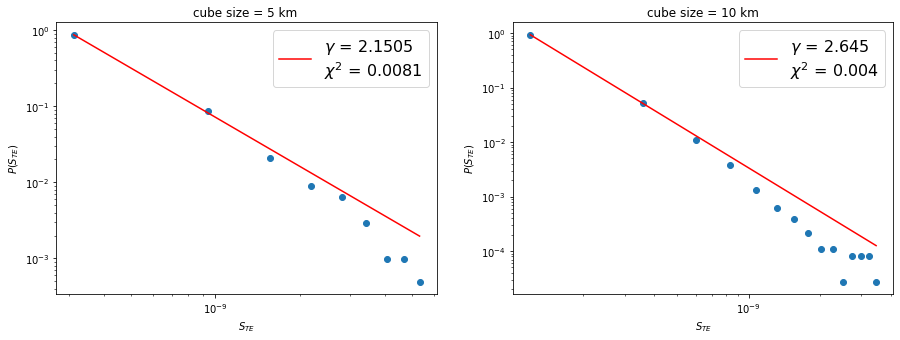

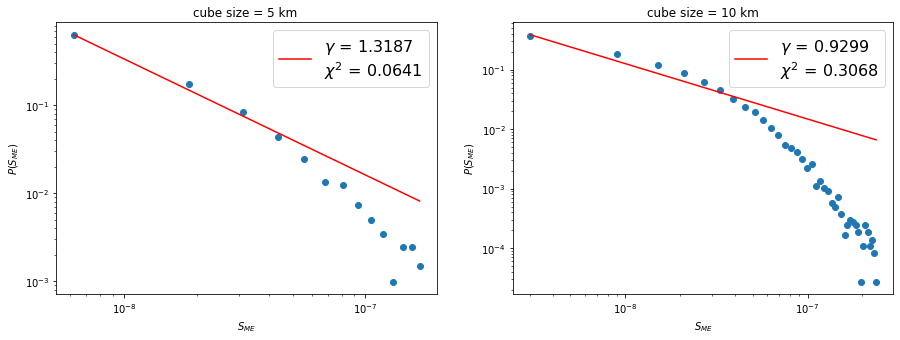

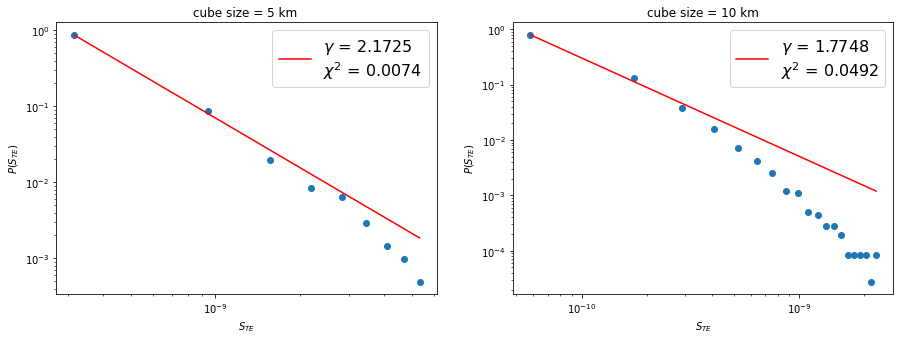

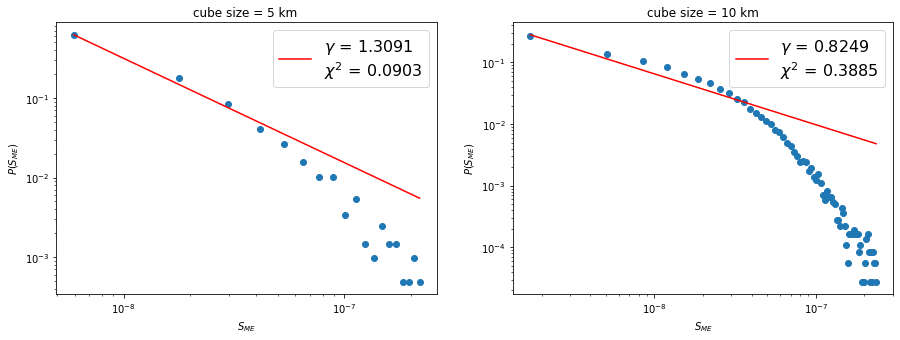

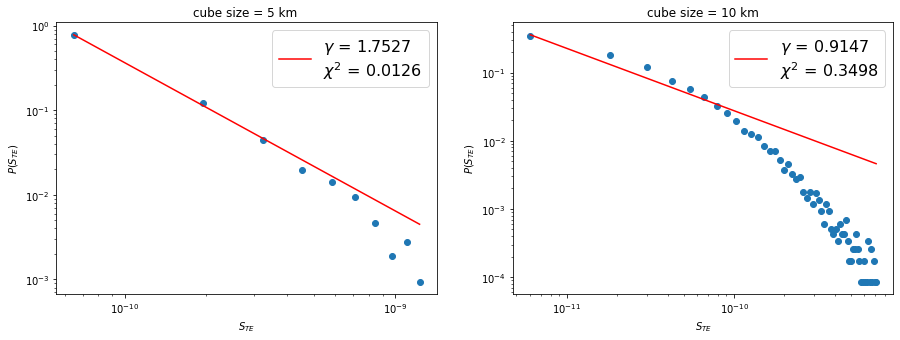

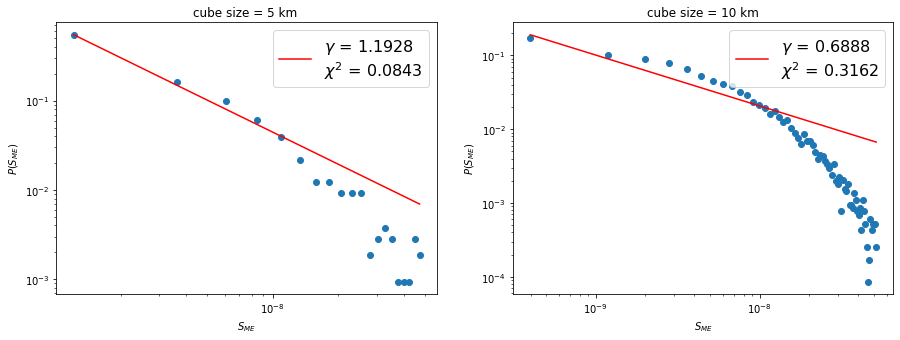

In [12]:
if not os.path.exists(f'./results/{region}/motifStatistics'):
    os.makedirs(f'results/{region}/motifStatistics')


sql_query= query(region)

for mag in (1,2,3):
    
    # Magnitude windows for the condition that collects the database through mySQL
    sql_query+=f" AND magnitude>={mag}"
    

    for side in (5,10):
        # Collect the database and create the graph
        # Magnitude window for the query that collects the database through mySQL


        # Collect the earthquakes
        quakes = getTable(sql_query)

        # Make the Cubes
        quakes = makeCubes(quakes,region,side,energyRelease=True)

        # Make the network
        G = graphCreation3(quakes)
        
        motifNodes,energyMotif = totalMeanEnergyMotif(region,side,mag,motif,G,quakes)
        
        areasWeightTotalMag,areasWeightMeanMag = areasInTriangles(motifNodes,energyMotif,G,quakes)
        
        # TOTAL ENERGY PLOTS
        hist, bins = np.histogram(areasWeightTotalMag,bins=round(math.sqrt(len(areasWeightTotalMag))))
        
        # Create the x as hist with zeros, force into floats ! 
        x = np.zeros_like(hist.astype(float))
        for i in range(1,len(bins)):
            x[i-1]=((bins[i]+bins[i-1])/2)

        for i in range(len(hist)):
            if hist[i]==0:
                y=np.array(hist[:i])
                x=np.array(x[:i])
                break
            else:
                y=hist

        y_norm = [float(i)/sum(y) for i in y]

        pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)

        # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
        chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
        
        if side == 5:
            # Plot the results
            fig, ax = plt.subplots(1,2,figsize=(15,5))

            # The data, scattered
            ax[0].scatter(x,y_norm)
            ax[0].set_xscale('log')
            ax[0].set_yscale('log')
            # The fit
            ax[0].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax[0].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax[0].set_title('cube size = 5 km ')
            ax[0].set_xlabel(r'$S_{TE}$')
            ax[0].set_ylabel(r'$P(S_{TE})$')

        if side == 10 :
            # Connectivity distribution ( data + fit)
            # The data, scattered
            ax[1].scatter(x,y_norm)
            ax[1].set_xscale('log')
            ax[1].set_yscale('log')
            # The fit
            ax[1].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax[1].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax[1].set_title('cube size = 10 km')
            ax[1].set_xlabel(r'$S_{TE}$')
            ax[1].set_ylabel(r'$P(S_{TE})$')
            
            #plt.suptitle(f'Surface distributions in {region} - magnitude>{mag}',fontsize=18)
            fig.savefig(f'./results/{region}/motifStatistics/motifs{motif}_network{region}_totalEnergy_{mag}mag.png')
           
        
        # MEAN ENERGY PLOTS 
        #fig.clear()
        hist, bins = np.histogram(areasWeightMeanMag,bins=round(math.sqrt(len(areasWeightMeanMag))))

        # Create the x as hist with zeros, force into floats ! 
        x = np.zeros_like(hist.astype(float))
        for i in range(1,len(bins)):
            x[i-1]=((bins[i]+bins[i-1])/2)

        for i in range(len(hist)):
            if hist[i]==0:
                y=np.array(hist[:i])
                x=np.array(x[:i])
                break
            else:
                y=hist

        y_norm = [float(i)/sum(y) for i in y]

        pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)

        # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
        chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))

        if side == 5:
            # Plot the results
            fig2, ax2 = plt.subplots(1,2,figsize=(15,5))

            # The data, scattered
            ax2[0].scatter(x,y_norm)
            ax2[0].set_xscale('log')
            ax2[0].set_yscale('log')
            # The fit
            ax2[0].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax2[0].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax2[0].set_title('cube size = 5 km ')
            ax2[0].set_xlabel(r'$S_{ME}$')
            ax2[0].set_ylabel(r'$P(S_{ME})$')

        if side == 10 :
            # Connectivity distribution ( data + fit)
            # The data, scattered
            ax2[1].scatter(x,y_norm)
            ax2[1].set_xscale('log')
            ax2[1].set_yscale('log')
            # The fit
            ax2[1].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax2[1].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax2[1].set_title('cube size = 10 km')
            ax2[1].set_xlabel(r'$S_{ME}$')
            ax2[1].set_ylabel(r'$P(S_{ME})$')

            #plt.suptitle(f'Surface distributions in {region} - magnitude>{mag}',fontsize=18)
            fig2.savefig(f'./results/{region}/motifStatistics/motifs{motif}_network{region}_meanEnergy_{mag}mag.png')

    # Extract the magnitude restrictions from the condition 
    sql_query = sql_query.replace(f" AND magnitude>={mag}", '')

In [15]:
# For which region networks do you want to analyze motifs ?
region = input('Input region : vrancea / romania / california / italy / japan : ')

# What motifs do you want to discover ?
motif = input('Input motif: Triangles (for areas) / Tetrahedrons (for volumes) : ')

/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetworks/venv/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/media/gabipana/hdd1/Work/PROJECTS/seismicNetw

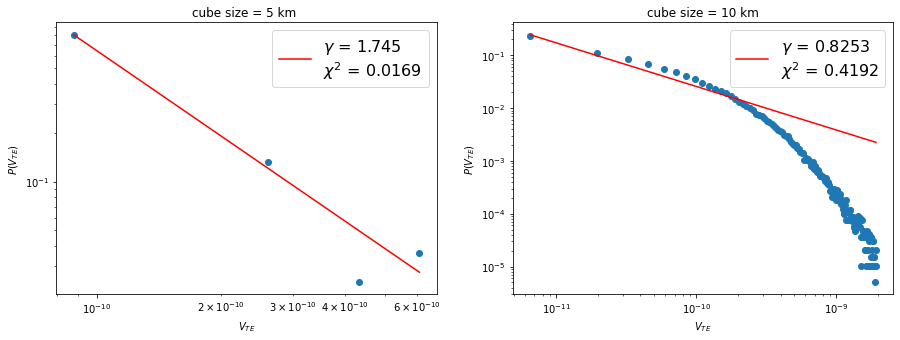

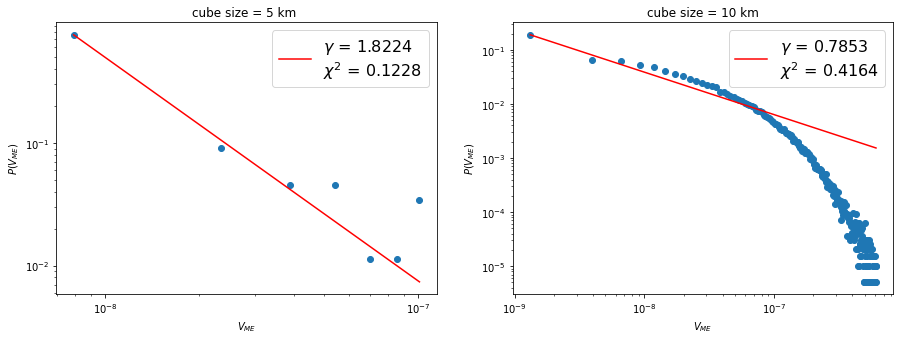

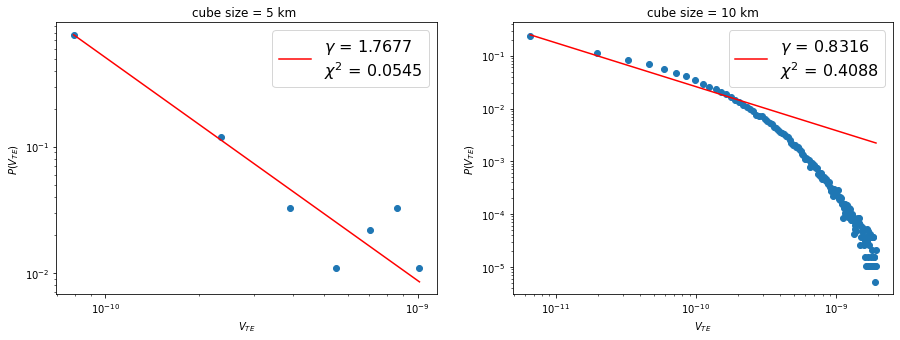

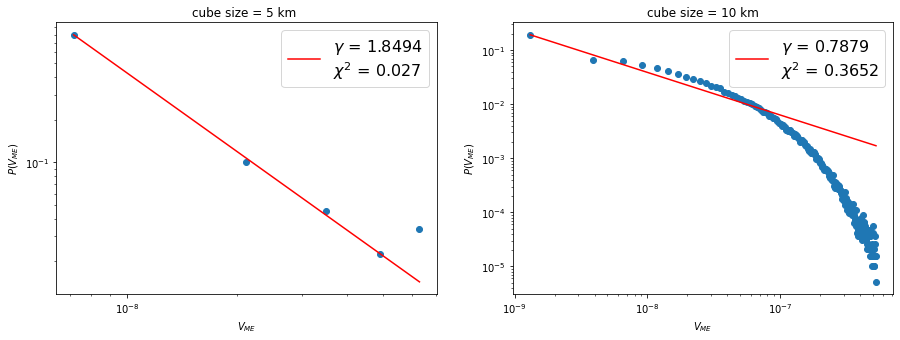

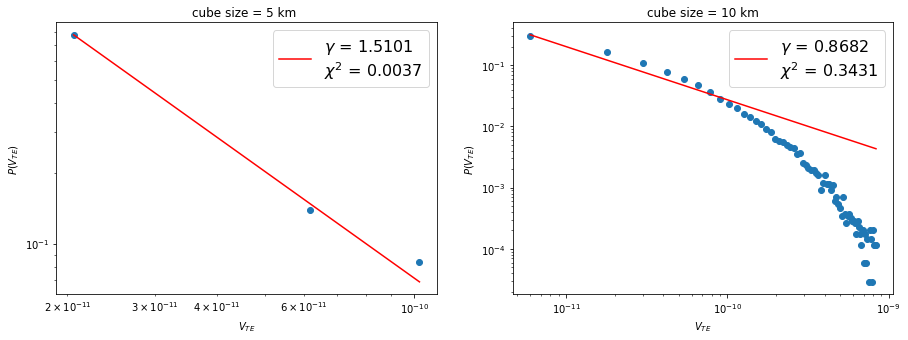

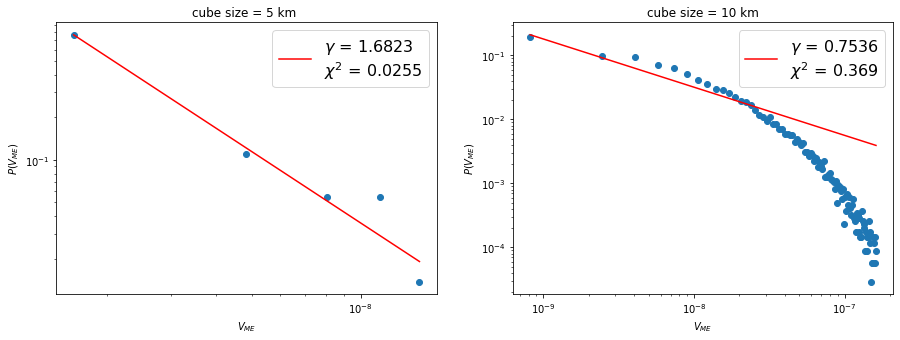

In [16]:
if not os.path.exists(f'./results/{region}/motifStatistics'):
    os.makedirs(f'results/{region}/motifStatistics')


sql_query= query(region)

for mag in (1,2,3):
    
    # Magnitude windows for the condition that collects the database through mySQL
    sql_query+=f" AND magnitude>={mag}"
    

    for side in (5,10):
        # Collect the database and create the graph
        # Magnitude window for the query that collects the database through mySQL


        # Collect the earthquakes
        quakes = getTable(sql_query)

        # Make the Cubes
        quakes = makeCubes(quakes,region,side,energyRelease=True)

        # Make the network
        G = graphCreation3(quakes)
        
        motifNodes,energyMotif = totalMeanEnergyMotif(region,side,mag,motif,G,quakes)
        
        volumesWeightTotalMag,volumesWeightMeanMag = volumesInSquares(motifNodes,energyMotif,G,quakes)
        hist, bins = np.histogram(volumesWeightTotalMag,bins=round(math.sqrt(len(volumesWeightTotalMag))))
        
        # Create the x as hist with zeros, force into floats ! 
        x = np.zeros_like(hist.astype(float))
        for i in range(1,len(bins)):
            x[i-1]=((bins[i]+bins[i-1])/2)

        for i in range(len(hist)):
            if hist[i]==0:
                y=np.array(hist[:i])
                x=np.array(x[:i])
                break
            else:
                y=hist

        y_norm = [float(i)/sum(y) for i in y]

        pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)

        # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
        chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
        
        if side == 5:
            # Plot the results
            fig, ax = plt.subplots(1,2,figsize=(15,5))

            # The data, scattered
            ax[0].scatter(x,y_norm)
            ax[0].set_xscale('log')
            ax[0].set_yscale('log')
            # The fit
            ax[0].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax[0].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax[0].set_title('cube size = 5 km ')
            ax[0].set_xlabel(r'$V_{TE}$')
            ax[0].set_ylabel(r'$P(V_{TE})$')

        if side == 10 :
            # Connectivity distribution ( data + fit)
            # The data, scattered
            ax[1].scatter(x,y_norm)
            ax[1].set_xscale('log')
            ax[1].set_yscale('log')
            # The fit
            ax[1].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax[1].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax[1].set_title('cube size = 10 km')
            ax[1].set_xlabel(r'$V_{TE}$')
            ax[1].set_ylabel(r'$P(V_{TE})$')
            
            #plt.suptitle(f'Volume distributions in {region} - magnitude>{mag}',fontsize=18)
            fig.savefig(f'./results/{region}/motifStatistics/motifs{motif}_network{region}_totalEnergy_{mag}mag.png')
        
            #fig.savefig(f'./motifs{region}Statistics/quakes{region}_totalEnergy_{mag}mag_squaresVolumes.png')

            
        # MEAN ENERGY MOTIFS
        #fig.clear()
        hist, bins = np.histogram(volumesWeightMeanMag,bins=round(math.sqrt(len(volumesWeightMeanMag))))
        
        # Create the x as hist with zeros, force into floats ! 
        x = np.zeros_like(hist.astype(float))
        for i in range(1,len(bins)):
            x[i-1]=((bins[i]+bins[i-1])/2)

        for i in range(len(hist)):
            if hist[i]==0:
                y=np.array(hist[:i])
                x=np.array(x[:i])
                break
            else:
                y=hist

        y_norm = [float(i)/sum(y) for i in y]

        pars, cov = curve_fit(f=power_law,xdata=x,ydata=y_norm,maxfev=5000)

        # Compute the chi_squared goodness of fit = sum( ( observed - expected )^2 / expected )
        chi_squared = np.sum((y_norm-power_law(x,*pars))**2/power_law(x,*pars))
        
        if side == 5:
            # Plot the results
            fig2, ax2 = plt.subplots(1,2,figsize=(15,5))

            # The data, scattered
            ax2[0].scatter(x,y_norm)
            ax2[0].set_xscale('log')
            ax2[0].set_yscale('log')
            # The fit
            ax2[0].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')


            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax2[0].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax2[0].set_title('cube size = 5 km ')
            ax2[0].set_xlabel(r'$V_{ME}$')
            ax2[0].set_ylabel(r'$P(V_{ME})$')

        if side == 10 :
            # Connectivity distribution ( data + fit)
            # The data, scattered
            ax2[1].scatter(x,y_norm)
            ax2[1].set_xscale('log')
            ax2[1].set_yscale('log')
            # The fit
            ax2[1].plot(x,power_law(x,*pars),
                       label=f'$\gamma$ = {np.round(pars[1],4)}\n$\chi^2$ = {np.round(chi_squared,4)}',
                       color='red')

            # Legend : gamma coefficient of fit and chi_squared goodness of fit
            ax2[1].legend(loc='upper right',fontsize=16,frameon=True)

            # Title of connectivity distribution ( data + fit )
            ax2[1].set_title('cube size = 10 km')
            ax2[1].set_xlabel(r'$V_{ME}$')
            ax2[1].set_ylabel(r'$P(V_{ME})$')
            
            #plt.suptitle(f'Volume distributions in {region} - magnitude>{mag}',fontsize=18)
            fig2.savefig(f'./results/{region}/motifStatistics/motifs{motif}_network{region}_meanEnergy_{mag}mag.png')

            #fig2.savefig(f'./motifs{region}Statistics/quakes{region}_meanEnergy_{mag}mag_squaresVolumes.png')
    # Extract the magnitude restrictions from the condition 
    sql_query = sql_query.replace(f" AND magnitude>={mag}", '')